In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re

In [17]:
num_of_participants = 20

file_paths = []
for i in range(1, num_of_participants + 1):
    file_paths.append(f"C:\\Users\\madle\\Documents\\UniSS25\\subject_daten\\subject-{i}.tsv")

dataframes = []
for file_path in file_paths:
    df = pd.read_csv(file_path, sep='\t')
    dataframes.append(df)

C:\Users\madle\AppData\Local\Temp\ipykernel_10528\200577632.py:9: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')
C:\Users\madle\AppData\Local\Temp\ipykernel_10528\200577632.py:9: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')
C:\Users\madle\AppData\Local\Temp\ipykernel_10528\200577632.py:9: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')
C:\Users\madle\AppData\Local\Temp\ipykernel_10528\200577632.py:9: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')
C:\Users\madle\AppData\Local\Temp\ipykernel_10528\200577632.py:9: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df 

C:\Users\madle\AppData\Local\Temp\ipykernel_10528\2908343584.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


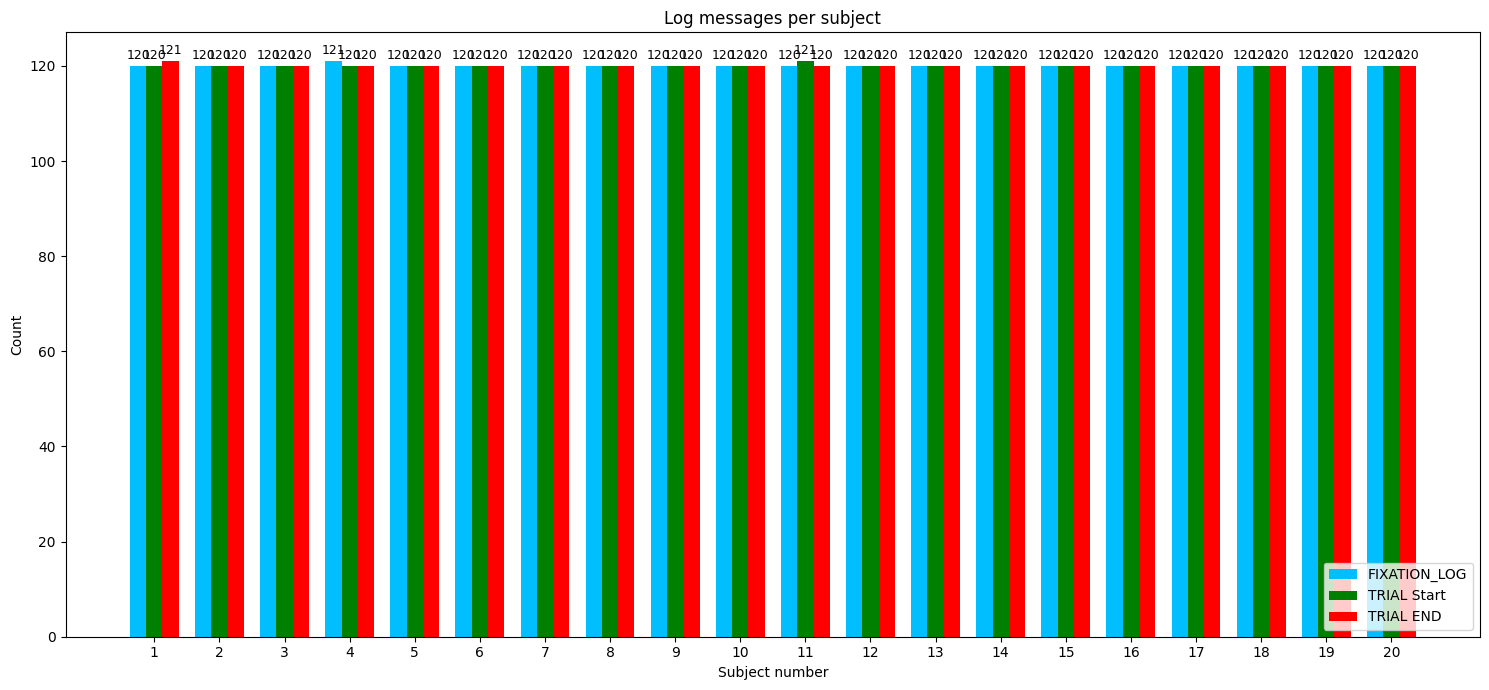

In [18]:
# get the number of FIXATION_LOG, TRIAL [trial_number]: ... and TRIAL [trial_number]: END entries in the user column from all dataframes for each subject

fixation_counts = []
trials_start_counts = []
trials_end_counts = []
for df in dataframes:
    user_entries = df[df['USER'].notna()]
    
    # count FIXATION_LOG entries
    fixation_count = user_entries['USER'].str.contains('FIXATION_LOG').sum()
    fixation_counts.append(fixation_count)
    
    # count TRIAL start entries
    trials_start = user_entries['USER'].str.contains(r'TRIAL \d+:') & ~user_entries['USER'].str.contains('END')
    trials_start_count = trials_start.sum()
    trials_start_counts.append(trials_start_count)
    
    # count TRIAL END entries
    trials_end = user_entries['USER'].str.contains(r'TRIAL \d+: END')
    trials_end_count = trials_end.sum()
    trials_end_counts.append(trials_end_count)

# plot the counts for each subject as grouped bars in a single plot
labels = [str(i+1) for i in range(num_of_participants)]
x = np.arange(num_of_participants)
width = 0.25

fig, ax = plt.subplots(figsize=(15, 7))
#rects1 = ax.bar(x - width, fixation_counts, width, label='FIXATION_LOG', color='blue')
#rects2 = ax.bar(x, trials_start_counts, width, label='TRIAL Start', color='orange')
#rects3 = ax.bar(x + width, trials_end_counts, width, label='TRIAL END', color='green')

ax.set_xlabel('Subject number')
ax.set_ylabel('Count')
ax.set_title('Log messages per subject')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Use nicer colors for the bars
colors = ['#01beff', 'green', 'red']  # blue, red, green

rects1 = ax.bar(x - width, fixation_counts, width, label='FIXATION_LOG', color=colors[0])
rects2 = ax.bar(x, trials_start_counts, width, label='TRIAL Start', color=colors[1])
rects3 = ax.bar(x + width, trials_end_counts, width, label='TRIAL END', color=colors[2])

# Annotate bars
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [19]:
user_entries = dataframes[0][dataframes[0]['USER'].notna()]

# filter so that only entries with 'TRIAL' are present
user_entries = user_entries[user_entries['USER'].str.contains(r'TRIAL \d+: END')]

display(user_entries.head(130))

# find dupliccates
duplicates = user_entries[user_entries.duplicated(subset=['USER'], keep=False)]
if not duplicates.empty:
    print("Duplicates found:")
    display(duplicates)

# duplicates not present in log.txt file

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS,USER
1089,849747,5832.62158,76058127680,0.33221,0.46922,5832.38770,0.23389,9193,1,0.32265,...,1,0.03745,0.02033,0.59826,0.00536,1,0.50417,0.59444,0,TRIAL 1: END
2288,850946,5840.67334,76138645727,0.71709,0.49233,5840.39160,0.28174,9208,1,0.74206,...,1,0.18802,0.09637,2.75741,0.00592,0,0.50417,0.59444,0,TRIAL 2: END
3467,852125,5848.58398,76217751330,0.25210,0.56935,5848.39014,0.19385,9223,1,0.25576,...,1,0.03721,0.02128,0.60228,0.00660,1,0.50417,0.59444,0,TRIAL 3: END
4632,853290,5856.38721,76295787184,0.28172,0.48545,5856.16650,0.22070,9239,1,0.29355,...,1,0.03823,0.02011,0.57552,0.00491,1,0.50417,0.59444,0,TRIAL 4: END
5821,854479,5864.37207,76375632488,0.67739,0.49753,5863.79590,0.57617,9254,1,0.75613,...,1,0.04152,0.02179,0.59545,0.00483,1,0.50417,0.59444,0,TRIAL 5: END
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,1017848,6985.46484,87586562040,0.32836,0.39073,6985.17041,0.29443,11406,1,0.33255,...,1,0.04057,0.01259,0.61703,0.00541,1,0.47708,0.75463,0,TRIAL 116: END
169775,1018989,6993.11426,87663057672,0.69577,0.58769,6991.58105,1.53320,11420,1,0.70767,...,1,0.04438,0.01123,0.60159,0.00593,1,0.47708,0.75463,0,TRIAL 117: END
171012,1020226,7001.40771,87745990199,0.66600,0.50068,7000.87158,0.53613,11435,1,0.67366,...,1,0.05275,0.01001,0.60650,0.00587,1,0.47708,0.75463,0,TRIAL 118: END
172184,1021398,7009.26465,87824559976,0.70276,0.54025,7008.70850,0.55615,11449,1,0.71778,...,1,0.04450,0.01195,0.60818,0.00545,1,0.47708,0.75463,0,TRIAL 119: END


Duplicates found:


,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,LPOGX,...,LPUPILV,REYEX,REYEY,REYEZ,RPUPILD,RPUPILV,CX,CY,CS,USER
100810,949653,6527.95996,83011511645,0.08887,0.45979,6527.65479,0.24756,10541,0,0.02998,...,1,0.01749,0.01289,0.60744,0.00633,1,0.4875,0.7537,0,TRIAL 70: END
100811,949654,6527.96533,83011565371,0.08162,0.45564,6527.65479,0.24756,10541,0,0.03579,...,0,0.01678,0.01247,0.58749,0.00635,1,0.4875,0.7537,0,TRIAL 70: END


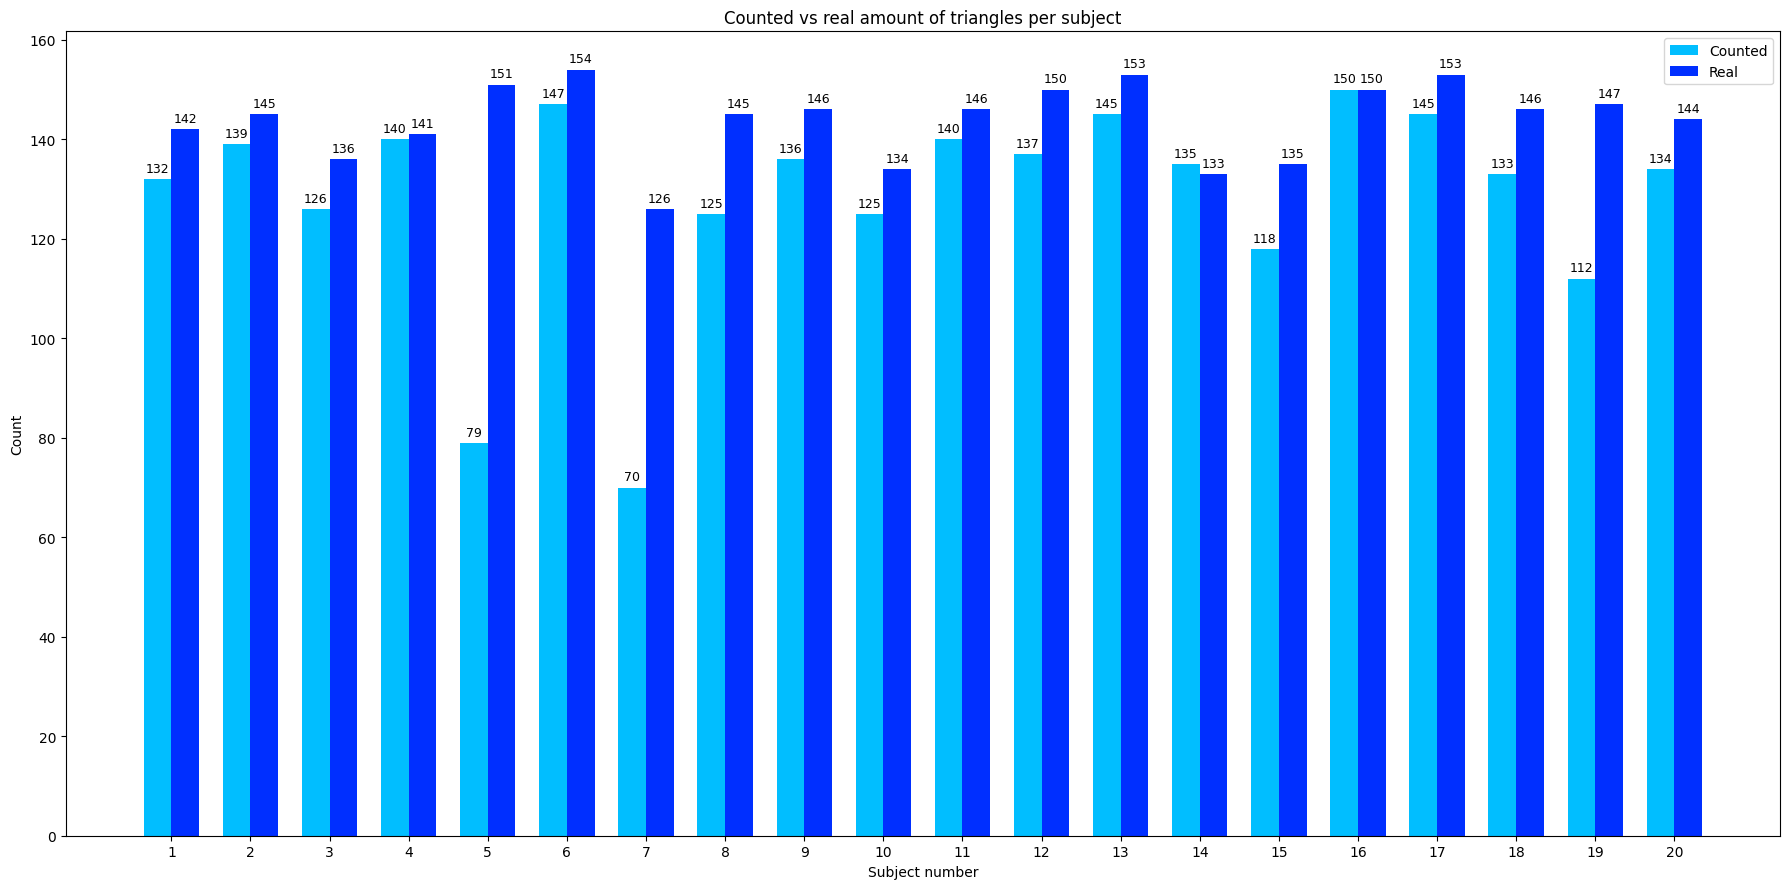

In [30]:
file_paths_csv = []
for i in range(1, num_of_participants + 1):
    file_paths_csv.append(f"C:\\Users\\madle\\Documents\\UniSS25\\subject_daten_csv\\subject-{i}.csv")

csv_file_texts = []
for file_path in file_paths_csv:
    with open(file_path, 'r') as file:
        csv_file_texts.append(file.read())

counted = []
real = []
for i, text in enumerate(csv_file_texts):
    subject_matches = re.findall(r"Trial Number: (\d+), Triangles counted: (\d+), real number: (\d+)", text)
    counted.append(0)
    real.append(0)
    for match in subject_matches:
        counted[i] += int(match[1])
        real[i] += int(match[2])

# plot the counted and real as a bar chart
colors = ['#01beff', '#002fff']  # blue, green
x = np.arange(num_of_participants)
width = 0.35
fig, ax = plt.subplots(figsize=(18, 9)) 
rects1 = ax.bar(x - width/2, counted, width, label='Counted', color=colors[0])
rects2 = ax.bar(x + width/2, real, width, label='Real', color=colors[1])
ax.set_xlabel('Subject number')
ax.set_ylabel('Count')  
ax.set_title('Counted vs real amount of triangles per subject')
ax.set_xticks(x)
ax.set_xticklabels([str(i+1) for i in range(num_of_participants)])
ax.legend()
# Annotate bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()